In [28]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [3]:
limit = 1500
dfMovies = pd.read_json(f'http://localhost:8000/movies?limit={limit}')
dfMovies.set_index('id', inplace=True)
dfMovies

,title,year,duration
id,,,
5257,Excuse Me,1915,50.0
6366,Anton the Terrible,1916,50.0
8351,The Mysterious Mrs. Musslewhite,1917,50.0
8384,On the Level,1917,50.0
8642,The Sunset Trail,1917,50.0
...,...,...,...
11633360,Royal Court of China: Half the Truth,1989,NaN
11833768,Neil Cicierega: Wow Wow (Audio),2017,3.0
11885402,Dan Aykroyd and Tom Hanks: City of Crime,1987,NaN


In [4]:
type(dfMovies)

pandas.core.frame.DataFrame

In [5]:
dfStatsMovieByYear = pd.read_json('http://localhost:8000/movies/count_by_year')
dfStatsMovieByYear.columns=['year', 'movie_count']
#dfStatsMovieByYear.set_index('year', inplace=True)
dfStatsMovieByYear

,year,movie_count
0,1915,1
1,1916,1
2,1917,7
3,1918,10
4,1919,10
...,...,...
101,2016,13
102,2017,17
103,2018,13
104,2019,23


In [6]:
# le résultat n'est pas fameux
dfStatsMovieByDirector = pd.read_json('http://localhost:8000/stars/stats_movie_by_director')
dfStatsMovieByDirector

,0,1
0,"{'birthdate': '1899-08-13', 'name': 'Alfred Hi...",60
1,"{'birthdate': '1942-11-17', 'name': 'Martin Sc...",48
2,"{'birthdate': '1946-12-18', 'name': 'Steven Sp...",41
3,"{'birthdate': '1930-05-31', 'name': 'Clint Eas...",39
4,"{'birthdate': '1940-09-11', 'name': 'Brian De ...",38
5,"{'birthdate': '1937-11-30', 'name': 'Ridley Sc...",35
6,"{'birthdate': '1946-09-22', 'name': 'John Woo'...",34
7,"{'birthdate': '1959-10-23', 'name': 'Sam Raimi...",31
8,"{'birthdate': '1969-10-09', 'name': 'Steve McQ...",31
9,"{'birthdate': None, 'name': 'John Ford', 'id':...",20


In [7]:
response = requests.get('http://localhost:8000/stars/stats_movie_by_director')
response

<Response [200]>

In [8]:

if response.status_code == 200:
    print('Response OK')
else:
    print('Error', response.status_code, response.json(), sep=', ')

Response OK


In [9]:

data_json = response.json()
data_json

[[{'birthdate': '1899-08-13', 'name': 'Alfred Hitchcock', 'id': 33}, 60],
 [{'birthdate': '1942-11-17', 'name': 'Martin Scorsese', 'id': 217}, 48],
 [{'birthdate': '1946-12-18', 'name': 'Steven Spielberg', 'id': 229}, 41],
 [{'birthdate': '1930-05-31', 'name': 'Clint Eastwood', 'id': 142}, 39],
 [{'birthdate': '1940-09-11', 'name': 'Brian De Palma', 'id': 361}, 38],
 [{'birthdate': '1937-11-30', 'name': 'Ridley Scott', 'id': 631}, 35],
 [{'birthdate': '1946-09-22', 'name': 'John Woo', 'id': 247}, 34],
 [{'birthdate': '1959-10-23', 'name': 'Sam Raimi', 'id': 600}, 31],
 [{'birthdate': '1969-10-09', 'name': 'Steve McQueen', 'id': 2588606}, 31],
 [{'birthdate': None, 'name': 'John Ford', 'id': 406}, 20],
 [{'birthdate': '1961-10-31', 'name': 'Peter Jackson', 'id': 1392}, 19],
 [{'birthdate': '1956-10-20', 'name': 'Danny Boyle', 'id': 965}, 18],
 [{'birthdate': '1954-08-16', 'name': 'James Cameron', 'id': 116}, 14],
 [{'birthdate': None, 'name': 'Walter Edwards', 'id': 250445}, 14],
 [{'bi

In [10]:
# applatir en liste de tuples
data_flatten = [ (director_dict['id'], director_dict['name'], director_dict['birthdate'], movie_count )  
         for director_dict, movie_count in data_json ]
data_flatten

[(33, 'Alfred Hitchcock', '1899-08-13', 60),
 (217, 'Martin Scorsese', '1942-11-17', 48),
 (229, 'Steven Spielberg', '1946-12-18', 41),
 (142, 'Clint Eastwood', '1930-05-31', 39),
 (361, 'Brian De Palma', '1940-09-11', 38),
 (631, 'Ridley Scott', '1937-11-30', 35),
 (247, 'John Woo', '1946-09-22', 34),
 (600, 'Sam Raimi', '1959-10-23', 31),
 (2588606, 'Steve McQueen', '1969-10-09', 31),
 (406, 'John Ford', None, 20),
 (1392, 'Peter Jackson', '1961-10-31', 19),
 (965, 'Danny Boyle', '1956-10-20', 18),
 (116, 'James Cameron', '1954-08-16', 14),
 (250445, 'Walter Edwards', None, 14),
 (233, 'Quentin Tarantino', '1963-03-27', 14),
 (634240, 'Christopher Nolan', '1970-07-30', 13),
 (102908, 'Robert N. Bradbury', None, 13),
 (94435, 'Bong Joon Ho', '1969-09-14', 12),
 (1053, 'Ethan Coen', '1957-09-21', 12),
 (1054, 'Joel Coen', '1954-11-29', 11)]

In [11]:

# applatir en list de dicts
data_flatten = [ {**director_dict, 'movie_count': movie_count }  
         for director_dict, movie_count in data_json ]
data_flatten

[{'birthdate': '1899-08-13',
  'name': 'Alfred Hitchcock',
  'id': 33,
  'movie_count': 60},
 {'birthdate': '1942-11-17',
  'name': 'Martin Scorsese',
  'id': 217,
  'movie_count': 48},
 {'birthdate': '1946-12-18',
  'name': 'Steven Spielberg',
  'id': 229,
  'movie_count': 41},
 {'birthdate': '1930-05-31',
  'name': 'Clint Eastwood',
  'id': 142,
  'movie_count': 39},
 {'birthdate': '1940-09-11',
  'name': 'Brian De Palma',
  'id': 361,
  'movie_count': 38},
 {'birthdate': '1937-11-30',
  'name': 'Ridley Scott',
  'id': 631,
  'movie_count': 35},
 {'birthdate': '1946-09-22', 'name': 'John Woo', 'id': 247, 'movie_count': 34},
 {'birthdate': '1959-10-23',
  'name': 'Sam Raimi',
  'id': 600,
  'movie_count': 31},
 {'birthdate': '1969-10-09',
  'name': 'Steve McQueen',
  'id': 2588606,
  'movie_count': 31},
 {'birthdate': None, 'name': 'John Ford', 'id': 406, 'movie_count': 20},
 {'birthdate': '1961-10-31',
  'name': 'Peter Jackson',
  'id': 1392,
  'movie_count': 19},
 {'birthdate': '195

In [12]:
dfStatsMovieByDirector = pd.DataFrame(data_flatten)
dfStatsMovieByDirector.set_index('id', inplace=True)
dfStatsMovieByDirector

,birthdate,name,movie_count
id,,,
33,1899-08-13,Alfred Hitchcock,60
217,1942-11-17,Martin Scorsese,48
229,1946-12-18,Steven Spielberg,41
142,1930-05-31,Clint Eastwood,39
361,1940-09-11,Brian De Palma,38
631,1937-11-30,Ridley Scott,35
247,1946-09-22,John Woo,34
600,1959-10-23,Sam Raimi,31
2588606,1969-10-09,Steve McQueen,31


In [13]:

dfStatsMovieByDirector.loc[33].birthdate

'1899-08-13'

In [14]:
datetime.strptime('1899-08-13', '%Y-%m-%d').date()

datetime.date(1899, 8, 13)

In [15]:
date.fromisoformat('1899-08-13')

datetime.date(1899, 8, 13)

In [16]:
dfStatsMovieByDirector[dfStatsMovieByDirector.birthdate.isnull()]

,birthdate,name,movie_count
id,,,
406,None,John Ford,20
250445,None,Walter Edwards,14
102908,None,Robert N. Bradbury,13


In [17]:
dfStatsMovieByDirector[~dfStatsMovieByDirector.birthdate.isnull()].birthdate.apply(date.fromisoformat)

id
33         1899-08-13
217        1942-11-17
229        1946-12-18
142        1930-05-31
361        1940-09-11
631        1937-11-30
247        1946-09-22
600        1959-10-23
2588606    1969-10-09
1392       1961-10-31
965        1956-10-20
116        1954-08-16
233        1963-03-27
634240     1970-07-30
94435      1969-09-14
1053       1957-09-21
1054       1954-11-29
Name: birthdate, dtype: object

In [18]:

# def fromisoformat_or_none(dt):
#    return date.fromisoformat(bd) if bd is not None else None

dfStatsMovieByDirector.birthdate = dfStatsMovieByDirector.birthdate.apply(
    lambda bd: date.fromisoformat(bd) if bd is not None else None)
dfStatsMovieByDirector

,birthdate,name,movie_count
id,,,
33,1899-08-13,Alfred Hitchcock,60
217,1942-11-17,Martin Scorsese,48
229,1946-12-18,Steven Spielberg,41
142,1930-05-31,Clint Eastwood,39
361,1940-09-11,Brian De Palma,38
631,1937-11-30,Ridley Scott,35
247,1946-09-22,John Woo,34
600,1959-10-23,Sam Raimi,31
2588606,1969-10-09,Steve McQueen,31


In [19]:
dfStatsMovieByDirector.loc[33].birthdate

datetime.date(1899, 8, 13)

In [20]:
# other idea: instead of apply read column birthdate as datetime64 (NaT)
limit = 1000
dfStars = pd.read_json(f'http://localhost:8000/stars?limit={limit}', convert_dates=['birthdate'])
dfStars.set_index('id', inplace=True)
dfStars

,name,birthdate
id,,
1,Fred Astaire,1899-01-01
2,Lauren Bacall,1924-01-01
3,Brigitte Bardot,1934-01-01
6,Ingrid Bergman,1915-01-01
8,Marlon Brando,1924-01-01
...,...,...
1710,David Schwimmer,1966-01-01
1711,Annabella Sciorra,1960-01-01
1714,Campbell Scott,1961-01-01


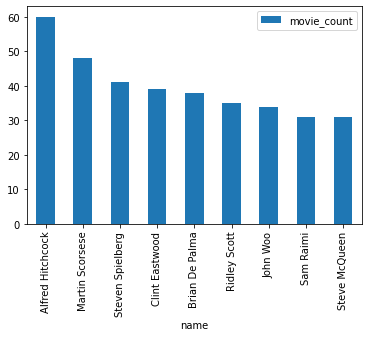

In [23]:
statsToPlot = dfStatsMovieByDirector[dfStatsMovieByDirector.movie_count > 30][['name','movie_count']] \
    .set_index('name')
statsToPlot.plot(kind='bar')

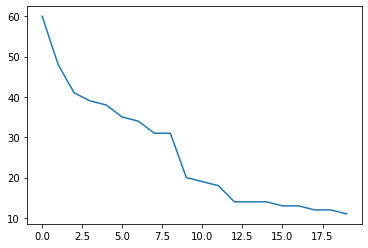

In [24]:
# 1 methode par type de graphe : plot, bar, piechart, ...
movie_count_ndarray = dfStatsMovieByDirector.movie_count.values
plt.plot(movie_count_ndarray)

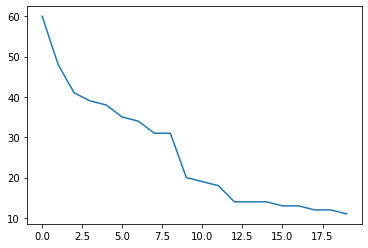

In [25]:
# fig : l'ensemble du dessin
# ax : 1 tracé
fig, ax = plt.subplots()
ax.plot(movie_count_ndarray)

Text(0.5, 1.0, 'diag bar')

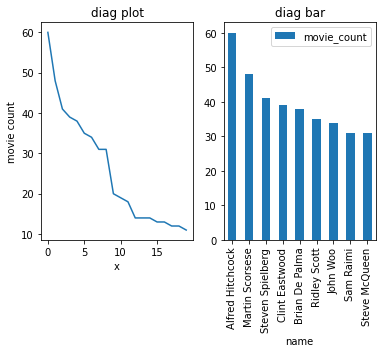

In [27]:
# fig : l'ensemble du dessin
# ax1, ax2 : 2 tracés
fig, (ax1, ax2) = plt.subplots(1,2)
# tracé 1 sur ax1
ax1.plot(movie_count_ndarray)
ax1.set_xlabel('x')
ax1.set_ylabel('movie count')
ax1.set_title('diag plot')
# tracé 2 sur ax2
statsToPlot.plot(kind='bar', ax=ax2)
ax2.set_title('diag bar')

In [29]:
x= np.arange(1000)
y= x**2+1


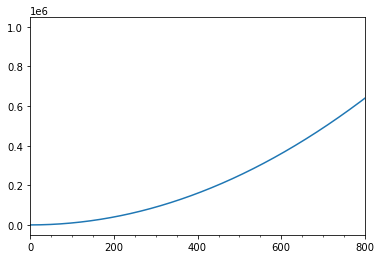

In [35]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(0,800)
#graduation majeure sur x
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
#graduation mineure sur x
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))

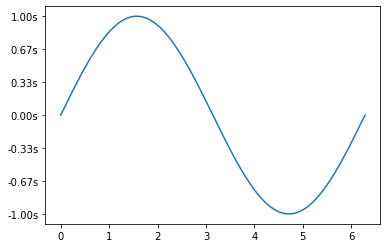

In [43]:
x = np.linspace(0,2*np.pi,1000)
y=np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y)
#graduation majeure sur y
ax.yaxis.set_major_locator(ticker.MultipleLocator(1/3))
#formattage des labels sur la formation 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,_: f'{y:.2f}s'))
#graduation mineure sur y
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

In [44]:
# formattage et graduation de datetime, ...
mdates.YearLocator()
mdates.MonthLocator()
mdates.DayLocator()
mdates.DateFormatter('%Y-%m')

################    Rendu pour tp    ######################

QUESTION 1

stars by_birthyear(1year)

In [162]:
year = 1958
dfStarsByBirthyear = pd.read_json(f"http://localhost:8000/stars/by_birthyear/{year}", convert_dates=['birthdate'])
dfStarsByBirthyear

,name,birthdate,id
0,'Chico' Hernandez,1958-01-01,379491
1,Adolfo Jimenez,1958-01-01,2444247
2,Alan Polonsky,1958-01-01,689797
3,Albert Macklin,1958-01-01,533621
4,Alec Baldwin,1958-01-01,285
...,...,...,...
132,Viggo Mortensen,1958-01-01,1557
133,Wanda De Jesus,1958-01-01,208962
134,Wayne Duvall,1958-01-01,245145
135,William Wai-Lun Duen,1958-01-01,1026247


movies by_title_part (1 fragment title)

In [169]:
part = "liberty "
dfMoviesByTitlePart = pd.read_json(f"http://localhost:8000/movies/by_title_part/?t={part}")
dfMoviesByTitlePart

,title,year,duration,id
0,Lady by the Sea: The Statue of Liberty,2004,55,397507
1,The Man Who Shot Liberty Valance,1962,123,56217


stats par acteurs

In [170]:
dfStatsByActor = requests.get("http://localhost:8000/stars/stats_first_last_movie_by_actor")

data_json = dfStatsByActor.json()
data_flatten = [ (actor_dict['name'],premierFilm, dernierFilm, movie_count )  
         for actor_dict, premierFilm, dernierFilm, movie_count in data_json ]
data_flatten = [ {**actor_dict,'premierFilm': premierFilm, 'dernierFilm': dernierFilm,  'movie_count': movie_count }  
         for actor_dict, premierFilm, dernierFilm, movie_count in data_json ]
dfStatsByActor = pd.DataFrame(data_flatten)
dfStatsByActor.set_index('name', inplace=True)
dfStatsByActor

,birthdate,id,premierFilm,dernierFilm,movie_count
name,,,,,
John Wayne,1907-05-26,78,1926,1976,172
Harrison Ford,1884-03-16,1230,1915,1932,86
Sylvester Stallone,1946-07-06,230,1969,2019,73
Sean Connery,1930-08-25,125,1954,2012,73
Tom Hanks,1956-07-09,158,1980,2020,69
...,...,...,...,...,...
James Stewart,1908-01-01,71,1948,1976,7
Kim Robillard,1955-01-01,732152,1988,2012,7
Harold Miller,1894-01-01,588443,1940,1961,7


QUESTION 2

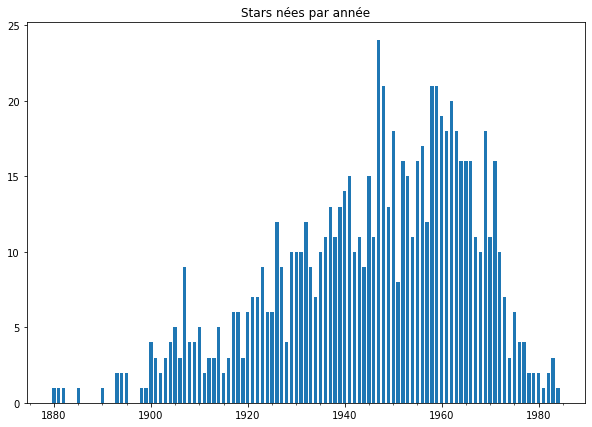

In [171]:
dfCountStarsByYear = dfStars[~dfStars.birthdate.isna()].groupby(pd.Grouper(key='birthdate', freq='Y')).count()
fig, ax = plt.subplots(1,1, figsize=(10,7))


ax.bar(dfCountStarsByYear.index, dfCountStarsByYear.name, width=250)
ax.set_title("Stars nées par année")
ax.xaxis.set_minor_locator(mdates.YearLocator(base=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


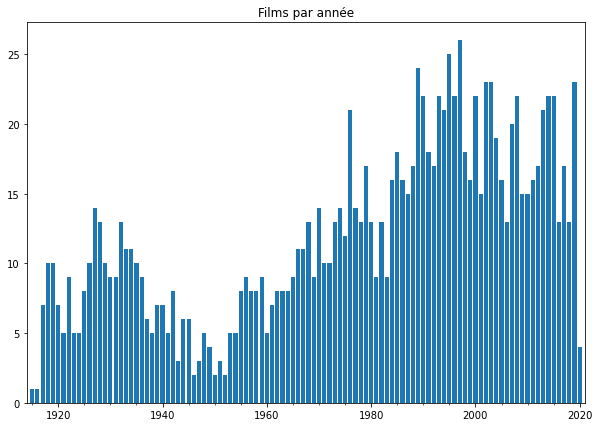

In [172]:
dfCountMoviesByYear = dfMovies.groupby(pd.Grouper(key='year')).count() [['title']]
fig, ax = plt.subplots(1,1, figsize=(10,7))

ax.bar(dfCountMoviesByYear.index, dfCountMoviesByYear.title)
ax.set_title("Films par année")
ax.set_xlim(1914, 2021)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

QUESTION 3

(1914.0, 2021.0)

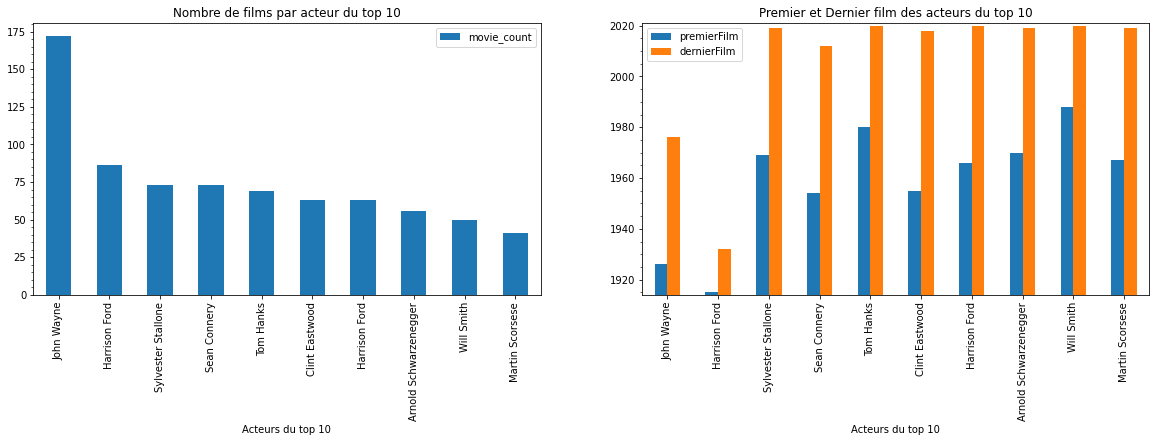

In [161]:
response = requests.get("http://localhost:8000/stars/stats_first_last_movie_by_actor")
data_json = response.json()
response_flatten = [ (actor_dict['birthdate'],actor_dict['name'],actor_dict['id'],premierFilm, dernierFilm, movie_count )  
         for actor_dict, premierFilm, dernierFilm, movie_count in data_json ]
response_flatten = [ {**actor_dict,'premierFilm': premierFilm, 'dernierFilm': dernierFilm,  'movie_count': movie_count }  
         for actor_dict, premierFilm, dernierFilm, movie_count in data_json ]
dfActors = pd.DataFrame(response_flatten)
dfActors['birthdate'] = pd.to_datetime(dfActors['birthdate']).dt.strftime("%d/%m/%Y")
dfTop10Actors = dfActors[:10] if dfActors.size >= 10 else dfActors



dfTop10ActorsMovie = dfTop10Actors[['name', 'movie_count']].set_index('name')
dfTop10ActorsYears = dfTop10Actors[['name', 'premierFilm', 'dernierFilm']].set_index('name')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

dfTop10ActorsMovie.plot(kind="bar", ax=ax1)
ax1.set_title("Nombre de films par acteur du top 10")
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.set_xlabel("Acteurs du top 10")

dfTop10ActorsYears.plot(kind="bar", ax=ax2)
ax2.set_title("Premier et Dernier film des acteurs du top 10")
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax2.set_xlabel("Acteurs du top 10")
ax2.set_ylim(1914, 2021)